In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Crop_recommendation.csv")
data


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [53]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [54]:
data.apply(lambda x:len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [55]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()

data['label'] = la.fit_transform(data['label'])
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


<Axes: >

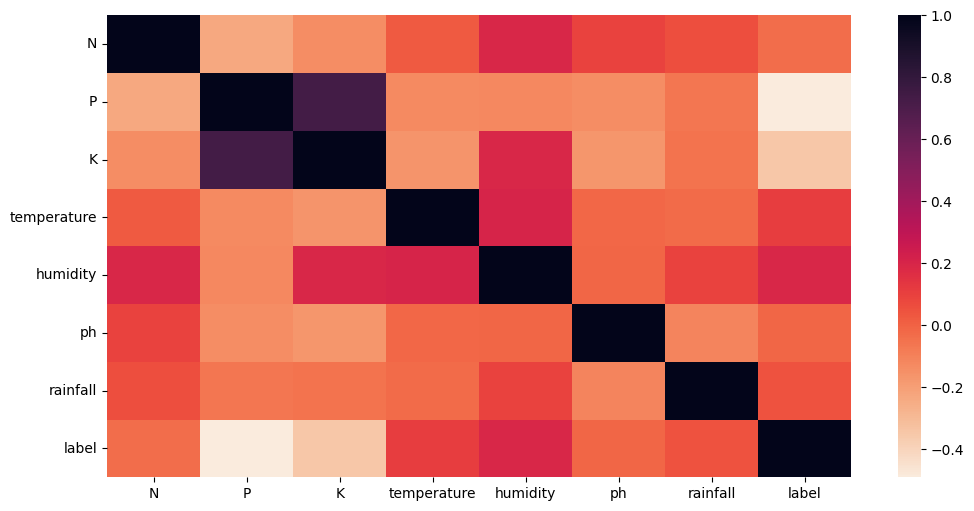

In [57]:
figure,ax = plt.subplots(figsize=(12,6))
corr = data.corr()
sns.heatmap(corr, ax=ax ,cmap="rocket_r")


<Axes: xlabel='P', ylabel='Count'>

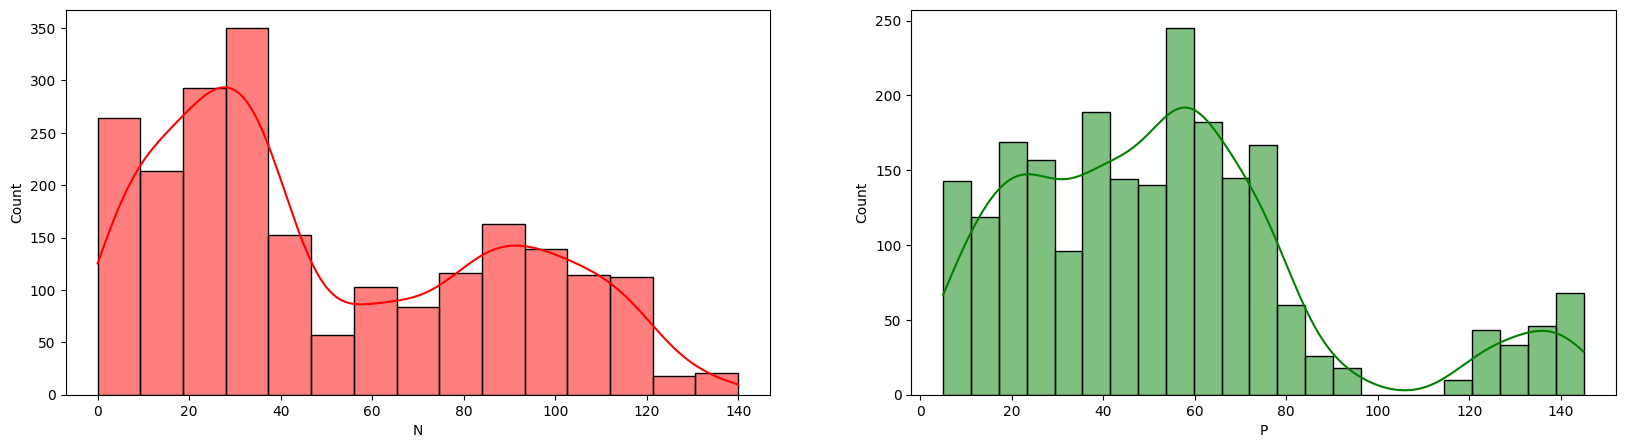

In [58]:
figure = plt.figure(figsize = (20,5))
ax = figure.add_subplot(121)

sns.histplot(data['N'] , color = 'red',ax=ax,kde = 'True')
ax = figure.add_subplot(122)

sns.histplot(data['P'],color='green',ax=ax,kde='True')

<Axes: xlabel='temperature', ylabel='Count'>

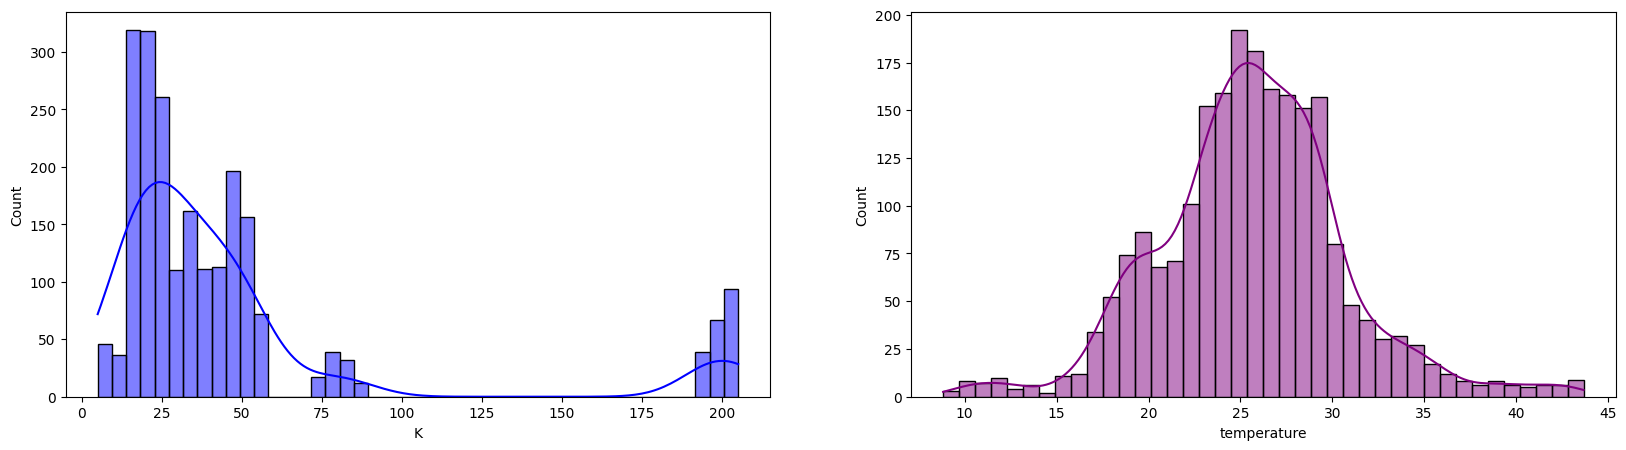

In [59]:
figure = plt.figure(figsize = (20,5))
ax = figure.add_subplot(121)

sns.histplot(data['K'] , color = 'blue',ax=ax,kde = 'True')
ax = figure.add_subplot(122)

sns.histplot(data['temperature'],color='purple',ax=ax,kde='True')

<Axes: xlabel='ph', ylabel='Count'>

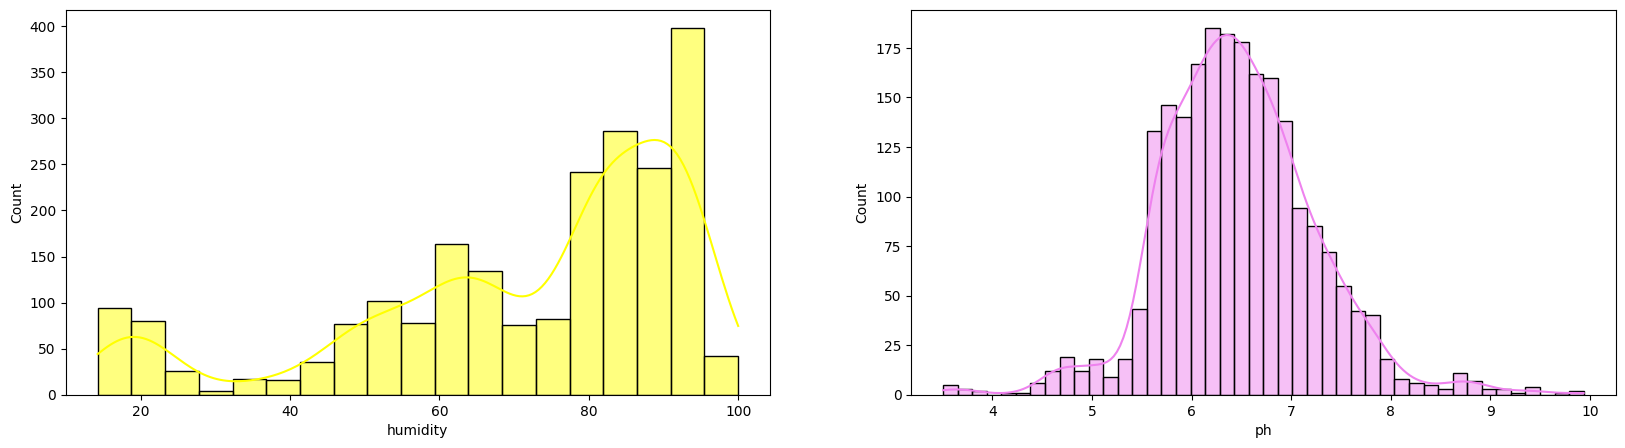

In [60]:
figure = plt.figure(figsize = (20,5))
ax = figure.add_subplot(121)

sns.histplot(data['humidity'] , color = 'yellow',ax=ax,kde = 'True')
ax = figure.add_subplot(122)

sns.histplot(data['ph'],color='violet',ax=ax,kde='True')

<Axes: xlabel='rainfall', ylabel='Count'>

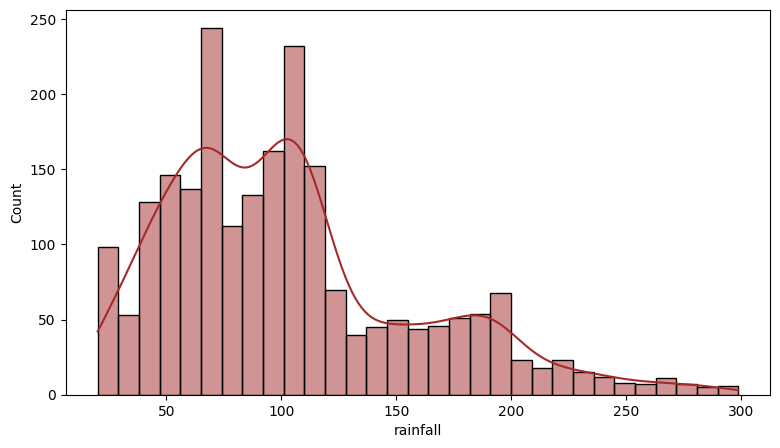

In [61]:
figure = plt.figure(figsize = (20,5))
ax = figure.add_subplot(121)

sns.histplot(data['rainfall'] , color = 'brown',ax=ax,kde = 'True')


In [62]:
x=data.drop('label',axis=1) 
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [63]:
y = data['label']
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32

In [64]:
model = []
accuracy = []

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size = 0.2, random_state=40)


In [65]:

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predict_x = dt.predict(x_test)
predict_x

array([ 2, 17,  5,  7, 12,  9, 19, 16, 11, 14, 16,  5,  4,  1, 18, 16,  6,
       19, 15, 17, 19,  1, 17, 19, 11, 13,  6,  6, 11,  9, 14,  4, 12,  5,
        2,  2,  8,  2, 16, 16,  8, 21, 13,  5,  8, 10, 20,  8, 18,  6,  8,
        0, 17, 15, 14,  7, 12,  3, 12,  7,  9, 18, 20, 17, 14, 17, 16,  7,
        0, 21, 19, 19, 17, 17, 10,  3, 14,  1, 15,  9,  5, 21,  7,  0,  6,
        0,  8,  7, 10, 12,  5,  5,  1, 10,  8,  0, 21, 12,  4, 14, 16, 15,
        3,  3, 21, 18,  5, 15, 18, 15,  9,  0, 17,  5, 12, 16,  4, 20, 17,
        5,  3,  7, 12,  7, 21, 17, 19, 19, 20, 16,  9, 20, 12,  6, 12,  3,
       12,  1, 11, 13,  9, 14, 19,  6, 16,  4,  2, 15, 11,  0,  1,  9, 10,
        9, 14,  1,  8,  6,  3,  9,  6,  1, 19,  9, 10, 20, 21,  6, 15, 21,
        7, 21,  2, 18,  9, 16,  6,  9, 21,  2, 17,  5,  1, 21,  2,  9,  5,
       10,  5,  4, 12,  7,  0,  1, 14, 19, 19,  9,  8,  4,  8, 13, 18,  2,
        1, 15,  9, 10, 19, 16, 10, 17, 20,  2, 18,  7, 11,  6, 20,  0,  8,
       10, 15,  0, 16, 12

In [66]:
dt_accuracy = dt.score(x_test,y_test)
dt_accuracy

0.9818181818181818

In [67]:
accuracy.append(dt_accuracy*100)
model.append("Decision Tree")

In [68]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
predict_x = lr.predict(x_test)
predict_x

c:\Users\suraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([ 2, 17,  5,  7, 12,  9, 19, 16, 11, 14, 16,  5,  4,  1, 18, 16,  6,
        4, 15, 17, 19,  1, 17, 19,  6, 13,  6,  6, 11,  9, 14,  4, 12,  5,
        2,  2,  8, 13, 16, 16,  8, 21, 13,  5,  8, 10,  8,  8, 18,  6,  8,
        0, 14, 15, 14,  7, 12,  3, 12,  7,  9, 18, 20, 17, 14, 17, 16,  7,
        0, 21, 19, 19, 17, 17, 10,  3, 14,  1, 15,  9,  5, 21,  7,  0,  6,
        0,  8,  7, 10, 12,  5,  5,  1, 10,  8,  0, 21, 12,  4, 14, 16, 15,
        3,  3, 21, 18,  5, 15, 18, 15,  9,  0, 17,  5, 12, 16,  4, 20, 10,
        5,  3,  7, 12,  7, 21, 17, 19, 19, 20, 16,  9, 20, 12,  6, 12,  3,
       12,  1, 11, 13,  9, 14, 19,  6, 16,  4,  2, 15,  6,  0,  1,  9, 10,
        9, 14,  1,  8,  6,  3,  9,  6,  1, 19,  9, 10, 20, 21,  6, 15, 21,
        7, 21,  2, 18,  9, 16,  6,  9, 21,  2, 17,  5,  1, 21, 10,  9,  5,
       10,  5, 19, 12,  7,  0,  1, 14, 19, 19,  9,  8,  4,  8, 13, 18,  2,
        1, 15,  9, 10, 19, 16, 10, 14, 20,  2, 18,  7, 11,  6, 20,  0,  8,
       10, 15,  0, 16, 12

In [69]:
lr_accuracy = lr.score(x_test,y_test)
lr_accuracy

0.9590909090909091

In [70]:
accuracy.append(lr_accuracy*100)
model.append("Logistic Regression")

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predict_x = rf.predict(x_test)
predict_x

array([ 2, 17,  5,  7, 12,  9, 19, 16, 11, 14, 16,  5,  4,  1, 18, 16,  6,
       19, 15, 17, 19,  1, 17, 19, 11, 13,  6,  6, 11,  9, 14,  4, 12,  5,
        2,  2,  8, 13, 16, 16,  8, 21, 13,  5,  8, 10, 20,  8, 18,  6,  8,
        0, 14, 15, 14,  7, 12,  3, 12,  7,  9, 18, 20, 17, 14, 17, 16,  7,
        0, 21, 19, 19, 17, 17, 10,  3, 14,  1, 15,  9,  5, 21,  7,  0,  6,
        0,  8,  7, 10, 12,  5,  5,  1, 10,  8,  0, 21, 12,  4, 14, 16, 15,
        3,  3, 21, 18,  5, 15, 18, 15,  9,  0, 17,  5, 12, 16,  4, 20, 17,
        5,  3,  7, 12,  7, 21, 17, 19, 19, 20, 16,  9, 20, 12,  6, 12,  3,
       12,  1, 11, 13,  9, 14, 19,  6, 16,  4,  2, 15,  6,  0,  1,  9, 10,
        9, 14,  1,  8,  6,  3,  9,  6,  1, 19,  9, 10, 20, 21,  6, 15, 21,
        7, 21,  2, 18,  9, 16,  6,  9, 21,  2, 17,  5,  1, 21,  2,  9,  5,
       10,  5,  4, 12,  7,  0,  1, 14, 19, 19,  9,  8,  4,  8, 13, 18,  2,
        1, 15,  9, 10, 19, 16, 10, 14, 20,  2, 18,  7, 11,  6, 20,  0,  8,
       10, 15,  0, 16, 12

In [72]:
rf_accuracy = rf.score(x_test,y_test)
rf_accuracy

0.9954545454545455

In [73]:
accuracy.append(rf_accuracy*100)
model.append("Random Forest")

(95.0, 100.0)

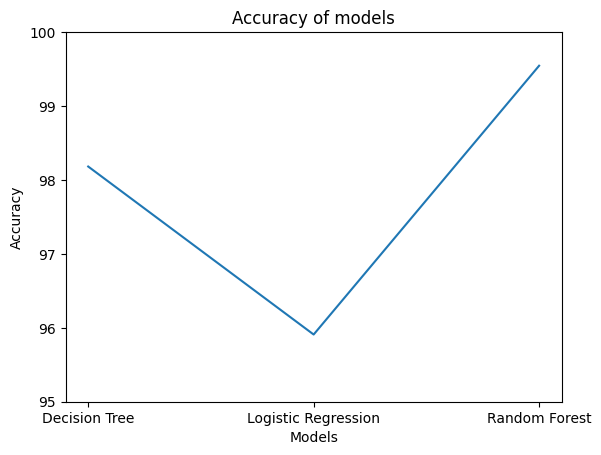

In [74]:
plt.title("Accuracy of models")
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.plot(model,accuracy)
plt.ylim(95,100)


<BarContainer object of 3 artists>

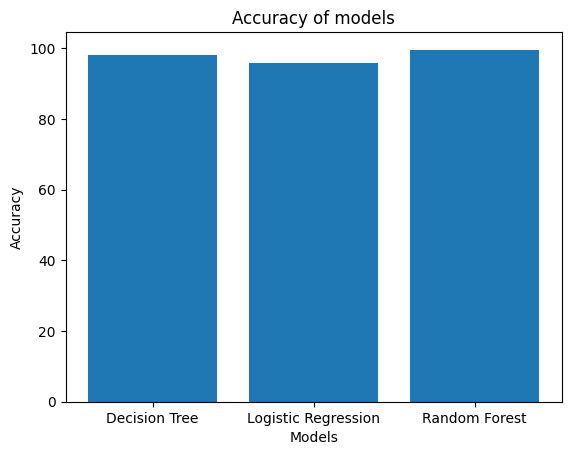

In [75]:
plt.title("Accuracy of models")
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.bar(model,accuracy)
